In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("C:\\Users\\monisha\\Downloads\\churn\\Mall_Customers.csv")


In [35]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
df.shape

(200, 5)

In [37]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [38]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [39]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [41]:
df.drop(["CustomerID"], axis=1, inplace=True)


In [42]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


C:\Users\monisha\AppData\Local\Temp\ipykernel_19416\457070290.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
C:\Users\monisha\AppData\Local\Temp\ipykernel_19416\457070290.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
C:\Users\monisha\AppData\Local\T

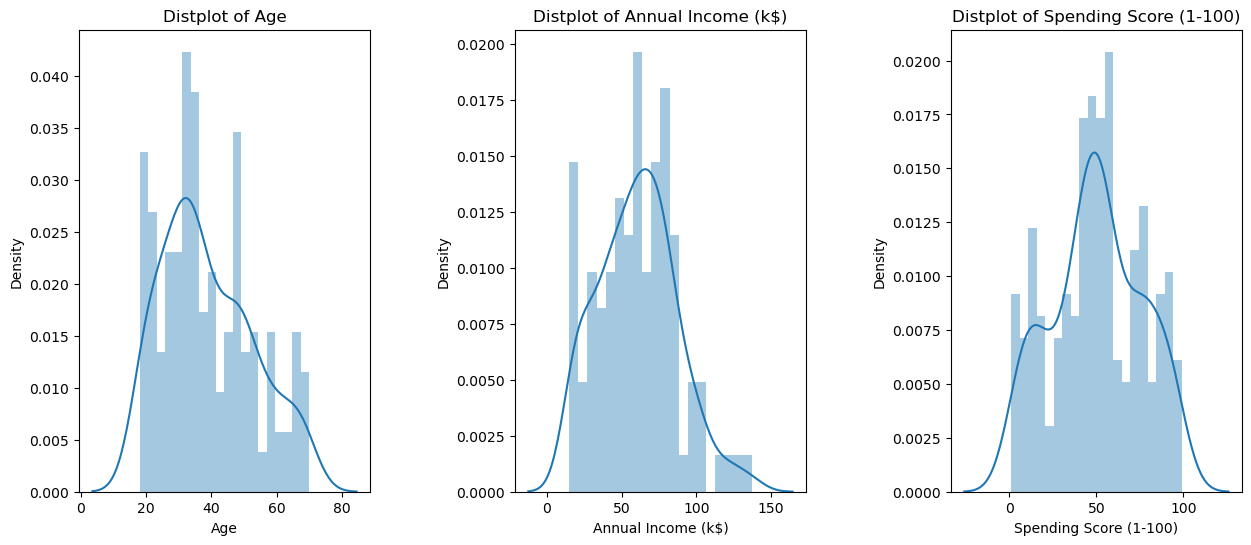

In [50]:
plt.figure(1, figsize=(15,6))
n=0
for x in['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace= 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()


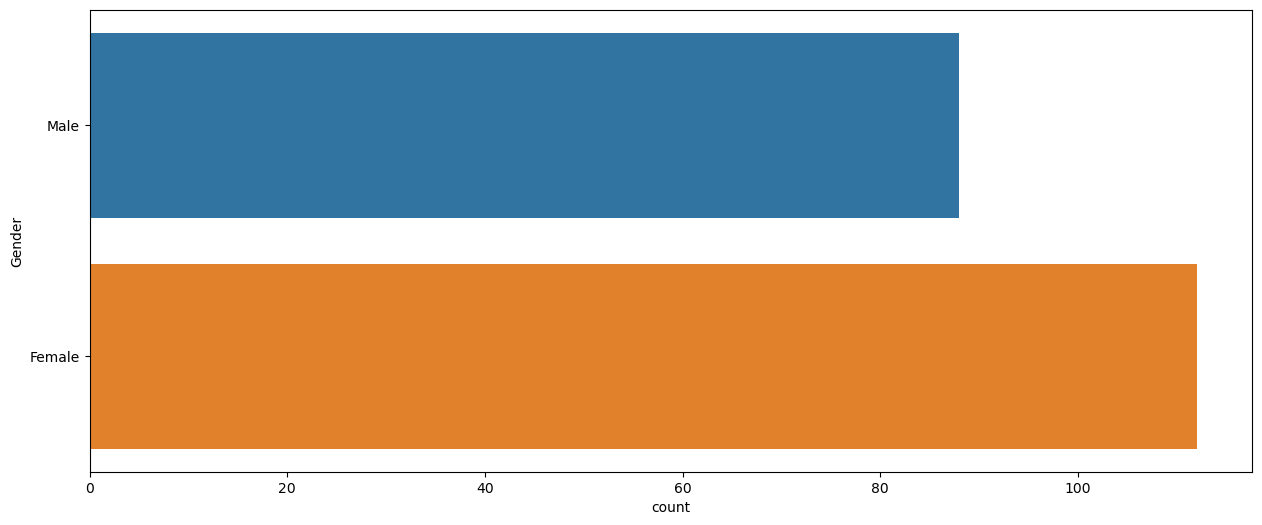

In [53]:
plt.figure(1, figsize=(15,6))
sns.countplot(y = 'Gender', data = df)
plt.show()

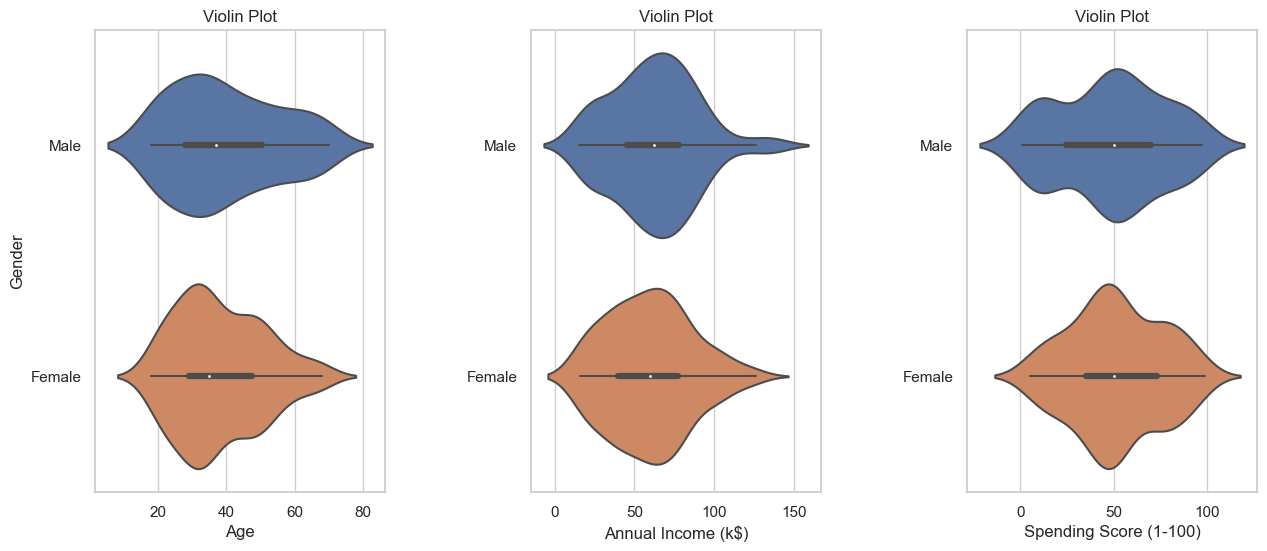

In [56]:
plt.figure(1, figsize=(15,6))
n=0
for cols in['Age', 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace= 0.5, wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender', data = df)
    plt.ylabel('Gender' if n == 1 else'')
    plt.title('Violin Plot')
plt.show()
    
    

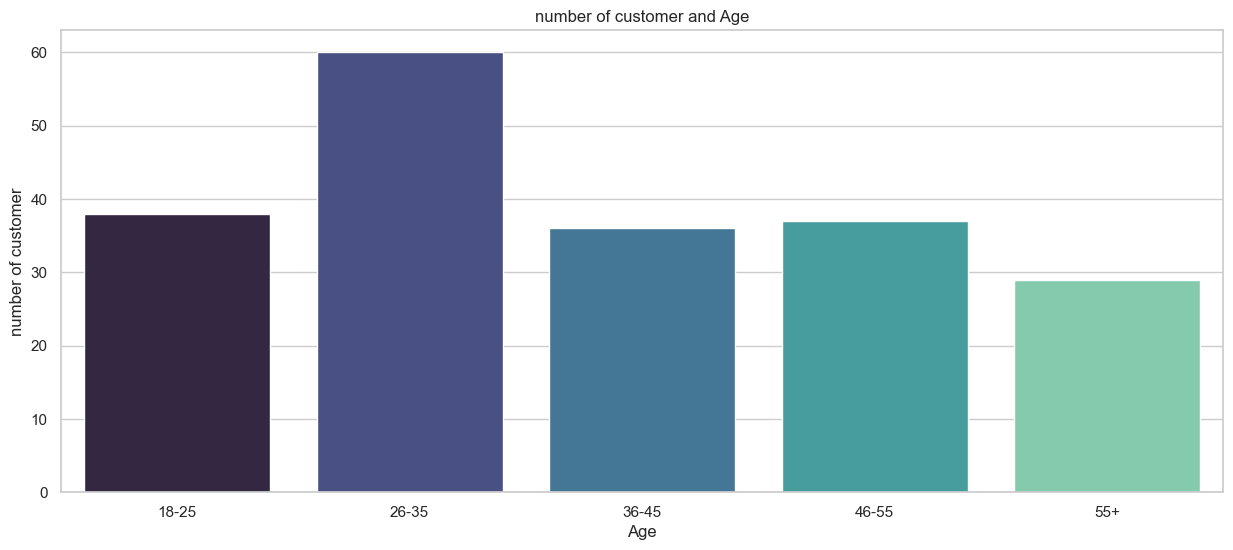

In [65]:
age_18_25 = df.Age[(df.Age>=18) & (df.Age<=25)]
age_26_35 = df.Age[(df.Age>=26) & (df.Age<=35)]
age_36_45 = df.Age[(df.Age>=36) & (df.Age<=45)]
age_46_55 = df.Age[(df.Age>=46) & (df.Age<=55)]
age_55above = df.Age[(df.Age>=56)]

agex = ["18-25", "26-35", "36-45", "46-55", "55+"]
agey = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values), len(age_55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette = "mako")
plt.title("number of customer and Age")
plt.xlabel("Age")
plt.ylabel("number of customer")
plt.show()



In [69]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [70]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.figure_factory as ff
%matplotlib inline

C:\Users\monisha\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [71]:
print("Mean of Annual Income (k$) of Female:",df['Annual Income (k$)'].loc[df['Gender'] == 'Female'].mean())
print("Mean of Annual Income (k$) of Male:",df['Annual Income (k$)'].loc[df['Gender'] == 'Male'].mean())

Mean of Annual Income (k$) of Female: 59.25
Mean of Annual Income (k$) of Male: 62.22727272727273


In [74]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
col = "Gender"
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
colors = ['gold', 'mediumturquoise']
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0],marker=dict(colors=colors, line=dict(color='#000000', width=2)))
layout = {'title': 'Gender(Male, Female)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [75]:
x=df
col='Age'
v1=x[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="0", marker=dict(color="rgb(63, 72, 204)"))
y = [trace1]
layout={'title':"Age count ",'xaxis':{'title':"Age"},'yaxis':{'title':"Count"}}
fig = go.Figure(data=y, layout=layout)
fig.layout.template='presentation'
iplot(fig)

In [77]:
d1=x[x['Gender']=='Male']
d2=x[x['Gender']=='Female']
col='Age'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Male", marker=dict(color="#ff7f0e"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Female", marker=dict(color='#a678de'))
y = [trace1, trace2]
layout={'title':"Age count [[ Male vs Female ]] ",'xaxis':{'title':"Age"},'yaxis':{'title':"Count"}}
fig = go.Figure(data=y, layout=layout)
fig.layout.template='presentation'
iplot(fig)


In [78]:
col='Spending Score (1-100)'
v2=x[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="Emb",  marker=dict(color="#e377c2"))
layout={'title':"Spending Score (1-100)",'xaxis':{'title':"spending score"},'yaxis':{'title':"Count"}}
fig = go.Figure(data=[trace1], layout=layout)
fig.layout.template='presentation'
iplot(fig)

In [79]:
col='Annual Income (k$)'
v2=x[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="Emb",  marker=dict(color="#6ad49b"))
layout={'title':"Annual Income in k$",'xaxis':{'title':"Anual income"},'yaxis':{'title':"Count"}}
fig = go.Figure(data=[trace1], layout=layout)
fig.layout.template='presentation'
iplot(fig)

In [80]:
col='Annual Income (k$)'
col1='Spending Score (1-100)'
v1=x[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=x[col1].value_counts().reset_index()
v2=v2.rename(columns={col1:'count1','index':col1})
v2['percent1']=v2['count1'].apply(lambda x : 100*x/sum(v2['count1']))
v2=v2.sort_values(col1)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Anual income", marker=dict(color="#6ad49b"))
trace2 = go.Scatter(x=v2[col1], y=v2["count1"], name="spending score", marker=dict(color='rgb(63, 72, 204)'))
y = [trace1, trace2]
layout={'title':"Anual income,Spending score [Male vs Female]",'xaxis':{'title':"spending score // Anual income "}}
fig = go.Figure(data=y, layout=layout)
fig.layout.template='presentation'
iplot(fig)


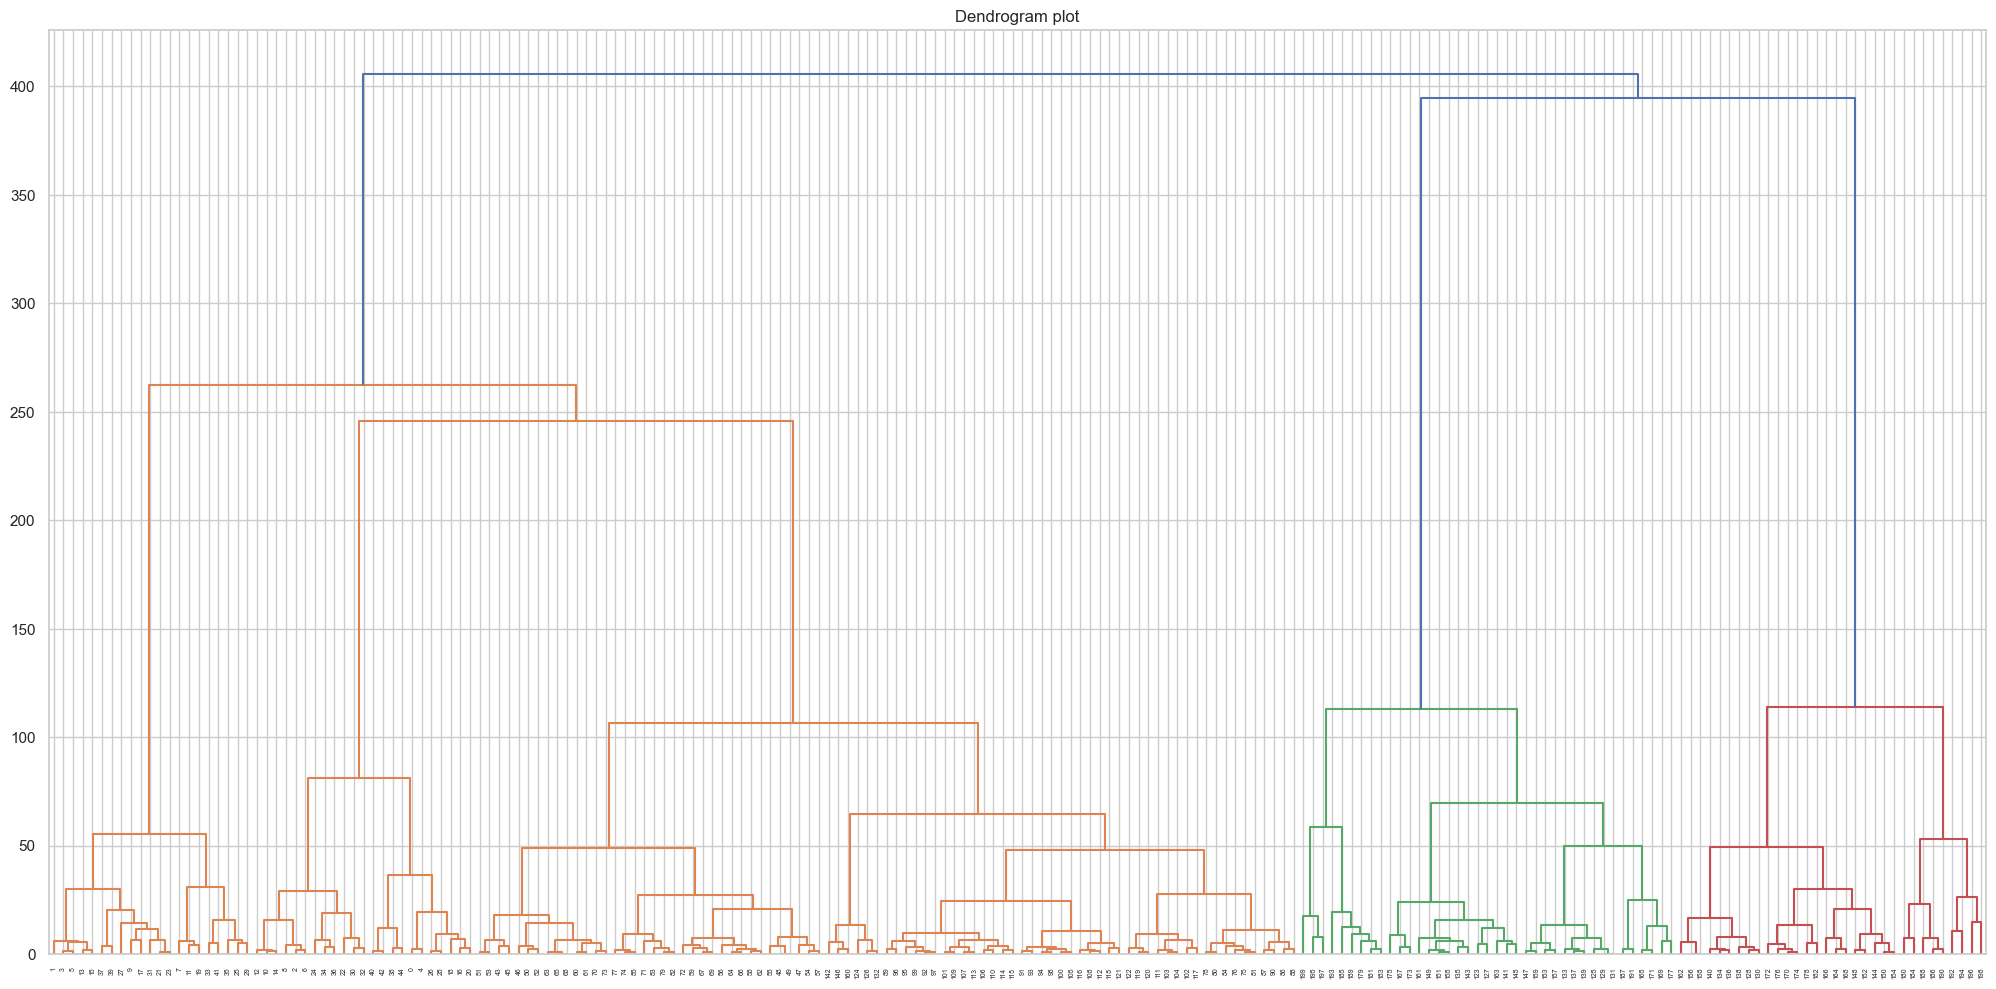

In [85]:
%matplotlib inline
import scipy.cluster.hierarchy as sch
X=df.iloc[:, [2,3]].values
plt.figure(figsize=(25,12))
dendrogram=sch.dendrogram(sch.linkage(X,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()#Hierarchical clustering is where you build a cluster tree


C:\Users\monisha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\monisha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\monisha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\monisha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chun

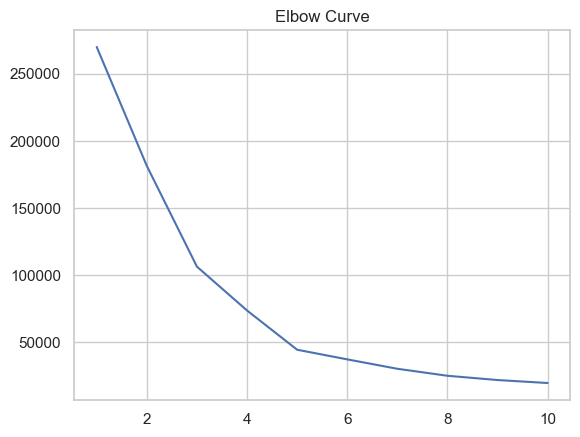

In [86]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.show() 


In [87]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)


C:\Users\monisha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



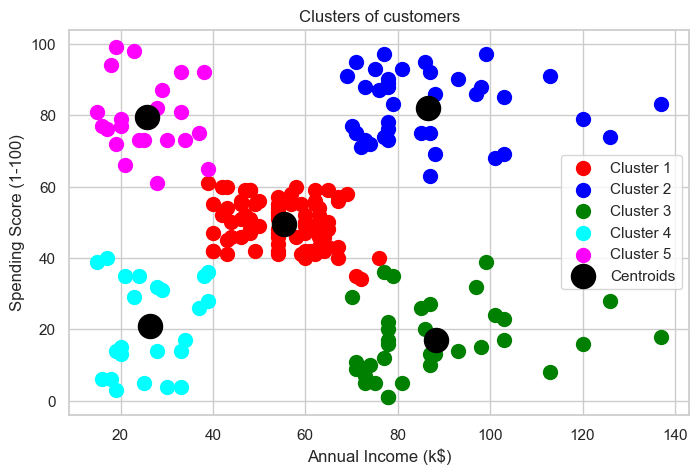

In [88]:
plt.figure(figsize=(8,5))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()